# 7. Logistic Regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 7.1 Supplementary functions

In [5]:
# 정규화

def normalize(X, mu=None, sigma=None):
  if mu is None and sigma is None:
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
  return (X - mu)/sigma, mu, sigma

In [6]:
# accuracy 측정

def get_accuracy(Y_true, Y_pred):
  assert len(Y_true) == len(Y_pred)
  return np.sum(Y_true == Y_pred)/len(Y_true)

In [7]:
# precision 측정

def get_precision(Y_true, Y_pred):
  assert len(Y_true) == len(Y_pred)
  return np.sum(np.logical_and(Y_true == Y_pred, Y_pred == True))/np.sum(Y_pred == True)

In [8]:
# sensitive 측정

def get_sensitivy(Y_true, Y_pred):
  assert len(Y_true) == len(Y_pred)
  return np.sum(np.logical_and(Y_true == Y_pred, Y_true == True))/np.sum(Y_true == True)

# 7.2 Sigmoid function

In [9]:
# sigmoid 함수 (logistic 함수)

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

(-4.0, 4.0)

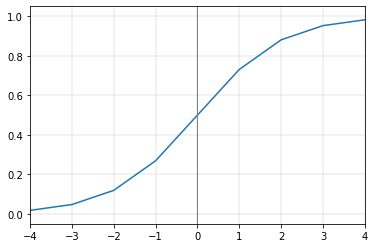

In [10]:
# sigmoid 개형 그리기

z = np.array(range(-10, 10, 1))
v = sigmoid(z)

plt.plot(z, v)
plt.axvline(c='grey', lw=1)

plt.grid(color='grey', linestyle='-', linewidth=.2)

plt.ylim(-0.05, 1.05)
plt.xlim(-4, 4)

# 7.3 Implementing logistic regression

In [11]:
# 에러 J(w)계산

def compute_cost(X, y, w):
  N = len(y)
  h = sigmoid(X @ w)
  epsilon = 1e-5
  cost = (1/N)*(((-y).T @ np.log(h + epsilon)) - ((1-y).T @ np.log(1-h + epsilon)))
  return cost

In [13]:
# gradient descent 수행

def gradient_descent(X, y, w, alpha, n_iters, threshold=1e-07): # alpha : 얼만큼 거리를 이동하며 찾을것인가 -> 적당히 작게
  N = len(y)
  log_j = []
  j_last = np.Inf

  for i in range(n_iters):
    w_new = w - (-alpha/N * (X.T @ (y - sigmoid(X @ w))))
    j_new = compute_cost(X, y, w)

    if j_last - j_new < threshold:
      break

    w = w_new
    log_j.append(j_new) # 업데이트
    j_last = j_new

  return w, log_j

In [12]:
# 학습 데이터 받아 계수 w 리턴하는 함수

def train_logreg(X_tr, y_tr, alpha=0.01, n_iters=1500):
  N_tr, d_tr = X_tr.shape

  X_tr_b = np.hstack((X_tr, np.ones((N_tr, 1)) ))
  w_init = np.zeros(d_tr + 1)

  initial_cost = compute_cost(X_tr_b, y_tr, w_init)
  print("initial J(w_init, D_tr) is: ", initial_cost, "\n")

  # w_star = 각 가중치. log_j는 loss가 얼마나 줄었는지
  w_star, log_j = gradient_descent(X_tr_b, y_tr, w_init, alpha, n_iters)

  print("w*: \n", w_star, "\n")
  print("J(w*, D_tr): ", log_j[-1])

  return w_star, log_j

In [21]:
# 학습된 w를 사용하여 입력 데이터 x에 대한 예측 결과 리턴

def predict_logreg(X, w):
  N, d = X.shape
  X_b = np.hstack((X, np.ones((N, 1))))

  y_prob = sigmoid(X_b @ w)
  y_pred = np.round(y_prob)

  return y_pred, y_prob

# 7.4 real data

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# 1) load the data
data = np.genfromtxt('drive/MyDrive/breast-cancer-wisconsin.csv', delimiter=',', skip_header=0)

# 2) remove rows with missing values
data = data[~np.isnan(data).any(axis=1)]

# 3) split data into X and y
X = data[:, 1:-1]
y = data[:, -1]

# 4) create 0/1 label vector
y[y==2] = 0
y[y==4] = 1

# 5) split data into 90% (615 instances) of trainset (X_tr, y_tr) and 10% (68 instances) of testset
N = data.shape[0]
N_tr = np.round(N*.9).astype(int)

X_tr = X[:N_tr, :]
y_tr = y[:N_tr]

X_ts = X[N_tr:, :]
y_ts = y[N_tr:]

print(X_tr.shape)
print(y_tr.shape)
print(X_ts.shape)
print(y_ts.shape)

(615, 9)
(615,)
(68, 9)
(68,)


In [20]:
# 6) 정규화
X_tr , mu_tr, sigma_tr = normalize(X_tr)
X_ts, _, _ = normalize(X_ts, mu_tr, sigma_tr)

In [25]:
# 모델의 학습 및 평가

# 7) train a logreg model
Model_logreg, log_j_logreg = train_logreg(X_tr, y_tr, 0.005, 3000)

# 8) apply the trained logreg model for prediction on both X_tr and X_ts
y_tr_pred, _ = predict_logreg(X_tr, Model_logreg)
y_ts_pred, _ = predict_logreg(X_ts, Model_logreg)

# 9) accuracy 계산
print('\n:: Result on D_tr ::')
print('Accuracy:', get_accuracy(y_tr, y_tr_pred))
print('Precision:', get_precision(y_tr, y_tr_pred))
print('Sensitivity:', get_sensitivy(y_tr, y_tr_pred))

print('\n:: Result on D_ts ::')
print('Accuracy:', get_accuracy(y_ts, y_ts_pred))
print('Precision:', get_precision(y_ts, y_ts_pred))
print('Sensitivity:', get_sensitivy(y_ts, y_ts_pred))

initial J(w_init, D_tr) is:  0.6931271807599426 

w*: 
 [ 0.69791806  0.60148189  0.65545492  0.5296396   0.46322818  0.82592807
  0.60273484  0.5292748   0.36595843 -0.45764689] 

J(w*, D_tr):  0.0962007329581487

:: Result on D_tr ::
Accuracy: 0.9707317073170731
Precision: 0.956140350877193
Sensitivity: 0.9646017699115044

:: Result on D_ts ::
Accuracy: 0.9852941176470589
Precision: 0.9285714285714286
Sensitivity: 1.0


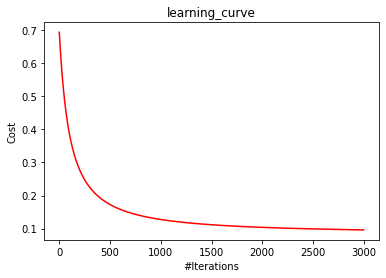

In [26]:
plt.plot(range(len(log_j_logreg)), log_j_logreg, 'r')
plt.title('learning_curve')
plt.ylabel('Cost')
plt.xlabel('#Iterations')
plt.show()